# Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time

import chart_studio.plotly as py
import plotly.graph_objs as go

## Load file with 2016 results
Use the Bib number as the index (every athlete has a different number)

In [2]:
df = pd.read_csv('marathon_results_2016_test.csv', index_col='Bib')

Make all times, timedeltas

In [3]:
df.iloc[:, 8:20] = df.iloc[:, 8:20].apply(pd.to_timedelta)

In [4]:
df.describe()

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
count,5775.000000,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775.000000,5775.000000,5775.000000
mean,37.312208,0 days 00:20:56.534718,0 days 00:41:53.243116,0 days 01:03:04.734718,0 days 01:24:39.525194,0 days 01:29:20.745974,0 days 01:46:32.417142,0 days 02:09:18.144242,0 days 02:33:11.756536,0 days 02:57:04.103376,0 days 00:07:10.011428,0 days 03:05:44.781991,0 days 03:07:41.467878,2888.000000,2076.948225,780.917056
std,8.895713,0 days 00:01:47.313830,0 days 00:03:23.813633,0 days 00:04:26.404172,0 days 00:05:57.630044,0 days 00:06:16.196657,0 days 00:07:05.235870,0 days 00:09:14.397892,0 days 00:10:13.975016,0 days 00:12:00.812237,0 days 00:00:26.926400,0 days 00:22:28.751651,0 days 00:11:46.018779,1667.243234,1456.633479,720.774357
min,18.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:05:04,0 days 00:00:00,0 days 02:12:45,1.000000,1.000000,1.000000
25%,30.000000,0 days 00:20:08,0 days 00:40:14,0 days 01:00:32,0 days 01:21:15,0 days 01:25:46,0 days 01:42:28,0 days 02:04:29.500000,0 days 02:27:25.500000,0 days 02:50:08.500000,0 days 00:06:52,0 days 02:59:42,0 days 02:59:55,1444.500000,722.500000,224.000000
50%,37.000000,0 days 00:21:07,0 days 00:42:11,0 days 01:03:26,0 days 01:25:08,0 days 01:29:49,0 days 01:47:08,0 days 02:10:13,0 days 02:34:45,0 days 02:59:19,0 days 00:07:16,0 days 03:09:58,0 days 03:10:07,2888.000000,1912.000000,545.000000
75%,44.000000,0 days 00:21:57,0 days 00:43:54,0 days 01:06:00,0 days 01:28:39.500000,0 days 01:33:34,0 days 01:51:34.500000,0 days 02:15:31.500000,0 days 02:40:45,0 days 03:06:09,0 days 00:07:32,0 days 03:17:17.500000,0 days 03:17:19.500000,4331.500000,3355.500000,1168.500000
max,68.000000,0 days 00:27:25,0 days 00:52:03,0 days 01:15:53,0 days 01:40:24,0 days 01:45:38,0 days 02:03:58,0 days 02:27:11,0 days 02:50:42,0 days 03:13:32,0 days 00:07:46,0 days 03:23:19,0 days 03:23:19,5775.000000,4799.000000,2612.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5775 entries, 5 to 11548
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Name           5775 non-null   object         
 1   Age            5775 non-null   int64          
 2   M/F            5775 non-null   object         
 3   City           5775 non-null   object         
 4   State          5030 non-null   object         
 5   Country        5775 non-null   object         
 6   Citizen        329 non-null    object         
 7   Unnamed: 8     4 non-null      object         
 8   5K             5775 non-null   timedelta64[ns]
 9   10K            5775 non-null   timedelta64[ns]
 10  15K            5775 non-null   timedelta64[ns]
 11  20K            5775 non-null   timedelta64[ns]
 12  Half           5775 non-null   timedelta64[ns]
 13  25K            5775 non-null   timedelta64[ns]
 14  30K            5775 non-null   timedelta64[ns]
 15  35K     

## Finishers by age

Text(0.5, 1.0, 'Participants per age group')

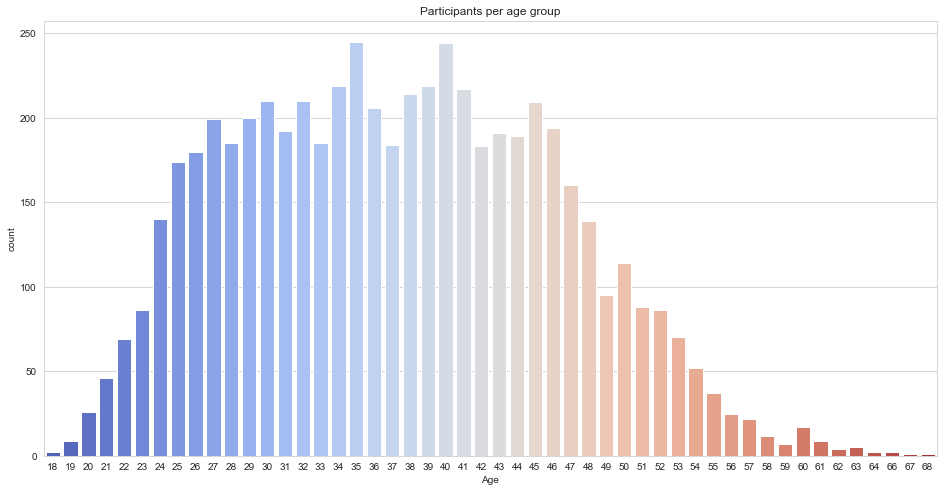

In [6]:
g = sns.countplot('Age', data=df, palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Participants per age group")


### Finishers by age and gender

In [7]:
x0=df['Age'][df['M/F']=='M']
x1=df['Age'][df['M/F']=='F']

trace2 = go.Histogram(x=x0, opacity=0.75, name='Male')
trace3 = go.Histogram(x=x1, opacity=0.75, name='Female', marker=dict(color='#F64E8B'))

data=[trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title='Age Distribution by Gender',
                   xaxis=dict(title='Age'),
                   yaxis=dict(title='Count'),
                   bargap=0.2)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

PlotlyRequestError: Authentication credentials were not provided.

Text(0.5, 1.0, 'Participants per Age & Gender')

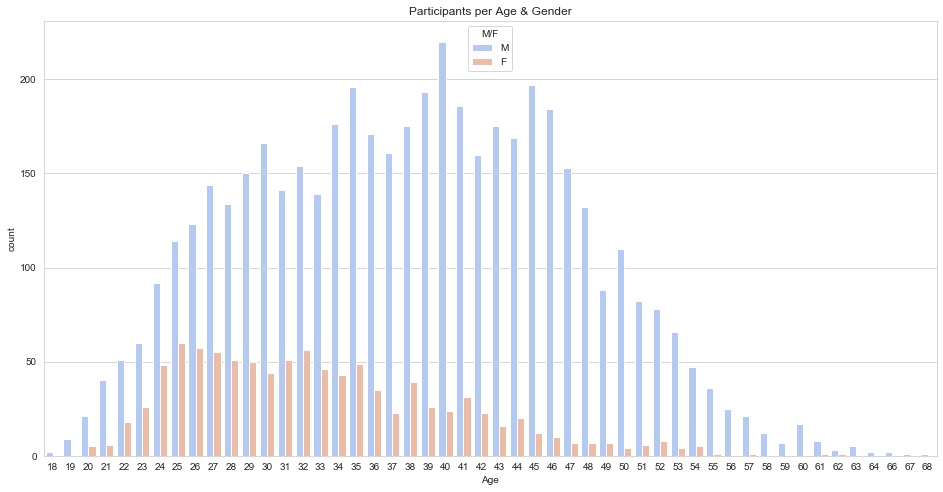

In [8]:
g = sns.countplot('Age', data=df, palette="coolwarm", hue='M/F')
g.figure.set_size_inches(16,8)
g.set_title("Participants per Age & Gender")

## Boxplot by age and gender

Text(0.5, 1.0, 'Distribution of finish times per Age group')

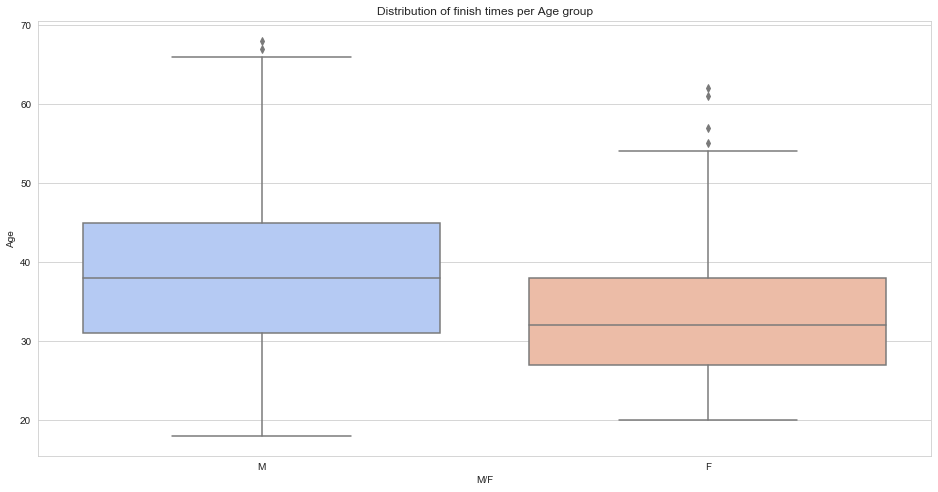

In [9]:
g = sns.boxplot(df['M/F'], df['Age'], palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Distribution of finish times per Age group")

### Distribution of official times by age
Official Time is transformed into a float to chart times.

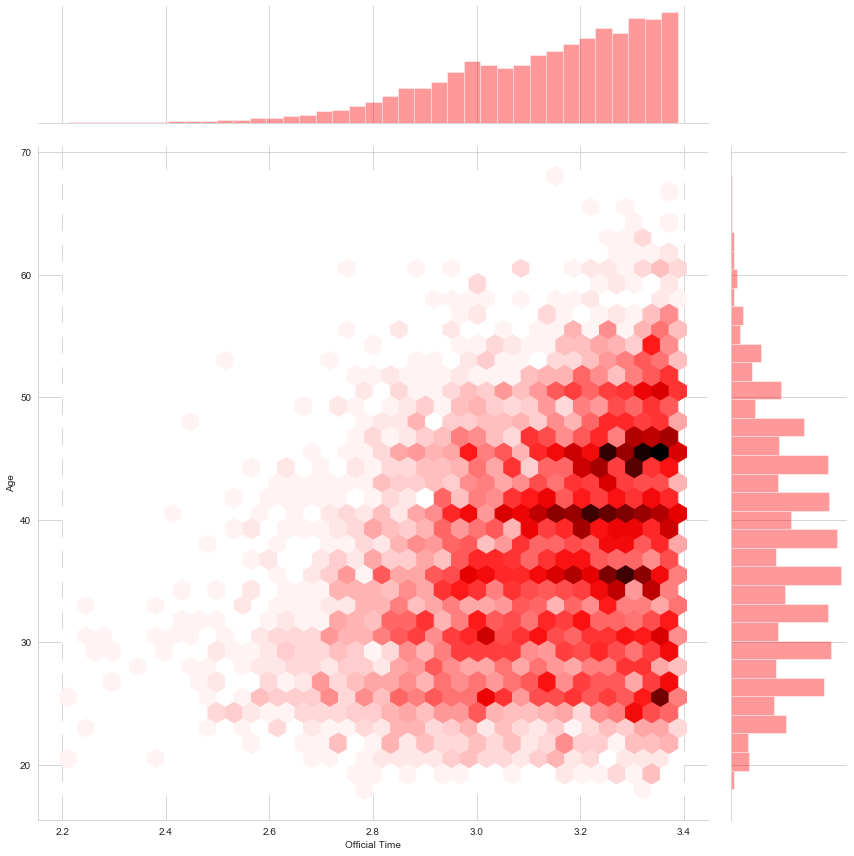

In [11]:
g = sns.jointplot( x=df['Official Time'].apply(lambda x: x.total_seconds()/3600), y=df['Age'], stat_func=None, kind='hex', color="r", height=12)

### Boxplot of finishing times by age

Text(0.5, 1.0, 'Distribution of finish times per Age group')

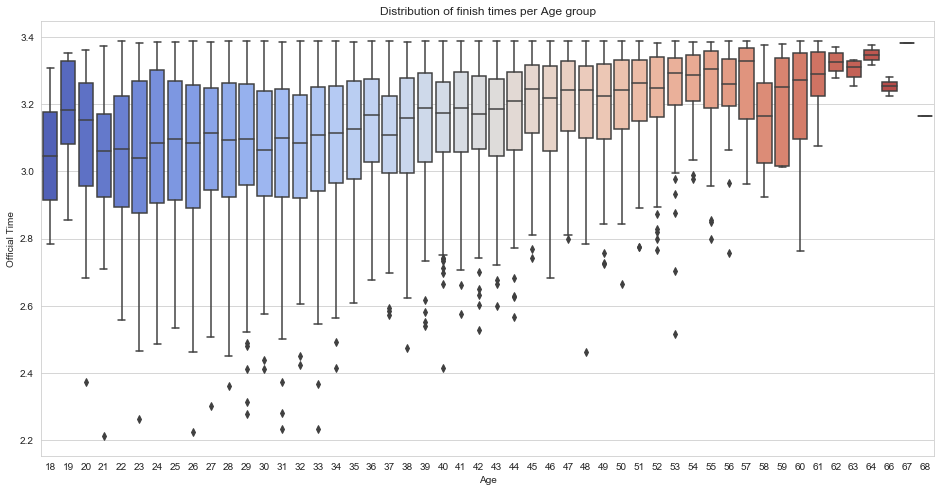

In [12]:
g = sns.boxplot(x='Age', y=df['Official Time'].apply(lambda x: x.total_seconds()/3600), data=df, palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Distribution of finish times per Age group")


### Overall placement by age and gender - probably useless...

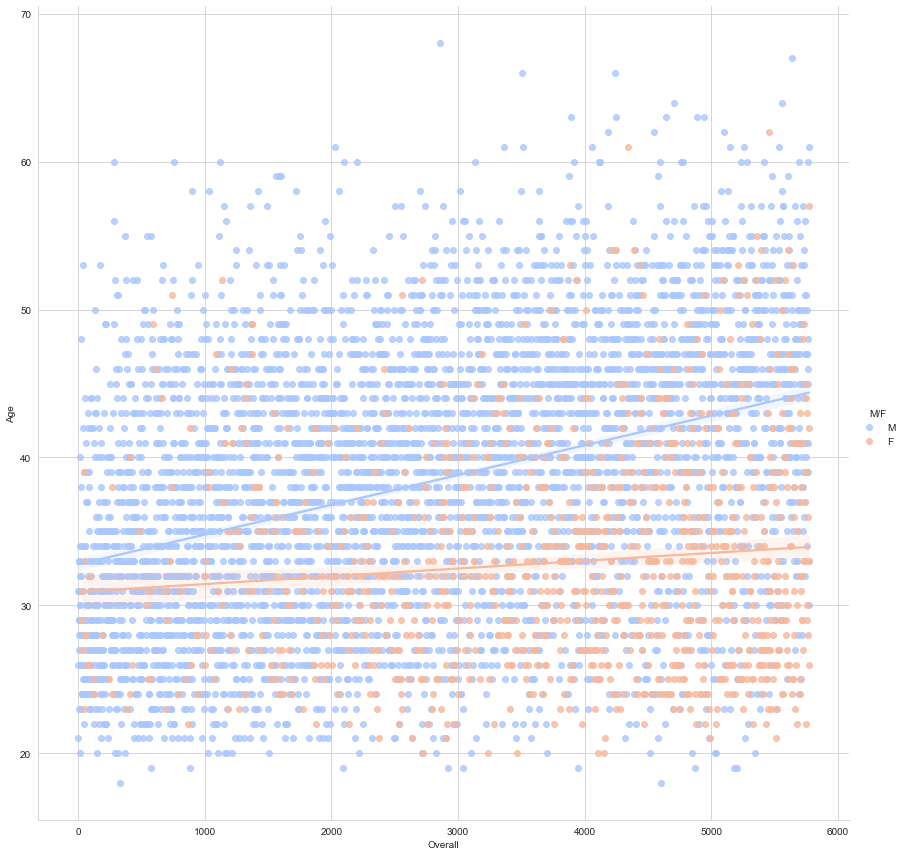

In [14]:
g = sns.lmplot(x='Overall', y='Age', data=df, hue='M/F', palette="coolwarm", height=12)


#### Separate the name column into first and last names

In [15]:
s = df['Name'].apply(lambda x: x.split(', '))
df['First Name'] = s.apply(lambda x: x[1])
df['Last Name'] = s.apply(lambda x: x[0])
df.drop('Name', axis=1, inplace=True)

## Most popular country - finishers

Text(0.5, 1.0, 'Most popular Country')

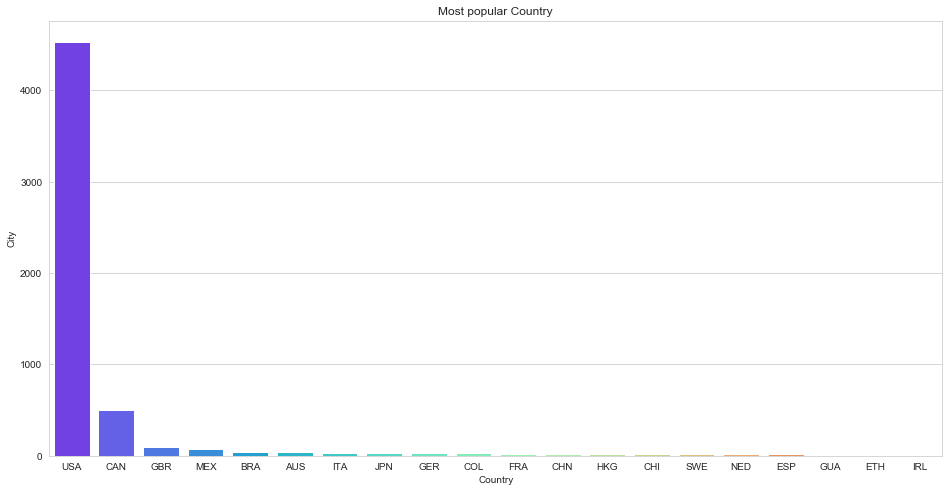

In [16]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country")

### Most popular country without USA

In [ ]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(21)[1:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country (after US)")

### most popular country without USA and Canada

In [ ]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country (after US and Canada)")

## Most popular city
required to check that the City is not null (one record has not city and crashes the kernel). Known bug that was supposed to be fixed with version .19 but it's not working here.

In [ ]:
s = df[df['City'].notnull()].groupby('City').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Reds')
g.figure.set_size_inches(16,8)
g.set_title("Most popular City")

## Most popular state
In the USA, there are some Canadian states that have more participants that some USA states

In [ ]:
s = df[df['Country'] == 'USA'].groupby('State').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="Oranges")
g.figure.set_size_inches(16,8)
g.set_title("Most popular State")

## Most popular last name

In [ ]:
s = df.groupby('Last Name').count()['First Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Blues')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Last Name")

## Most popular first name

In [ ]:
s = df.groupby('First Name').count()['Last Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Greens')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Name")

### Analysis of fist half vs second half...

In [ ]:
df['Half_2'] = df['Official Time'] - df['Half']

In [ ]:
df['Half'][df['Half'] == '0']

#### Calculate the difference between the first and second half 

In [ ]:
df['2nd_Split'] = (df['Half_2']-df["Half"])

In [ ]:
df['2nd_Split']= df['2nd_Split'].apply(lambda x: x.total_seconds()/60)

#### Plot the differences.
The distinct line of points over 150 and up is caused by the records that don't have a half marathon registered (except for the very last that is over 250).

In [ ]:
sns.lmplot(data=df, y='2nd_Split', x='Overall', size=12, markers='.')

#### Find the extreme cases of possitive split and negative split

In [ ]:
df[df['2nd_Split'] == df['2nd_Split'].max()][['5K', '10K','15K', '20K', '25K', '30K', '35K', '40K']]

In [ ]:
df[df['2nd_Split'] == df['2nd_Split'].max()]

In [ ]:
df[df['2nd_Split'] == df['2nd_Split'].min()][['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Division']]

In [ ]:
df[df['2nd_Split'] == df['2nd_Split'].min()]

#### Find how many negative splits - faster second half than first half. (particularly difficult in Boston due to the Newton Hills)

In [ ]:
df[df['2nd_Split'] < 0].sort_values(by='2nd_Split')

In [ ]:
(len(df[df['2nd_Split'] < 0].sort_values(by='2nd_Split'))/len(df))*100

Only 2.55% (680 finishers) of the finishers have a negative split.

#### Find the ones that have identical first half and second half

In [ ]:
df[df['2nd_Split']== 0].sort_values(by='2nd_Split')

Only 6 finishers have identical split times (quite rare)

### Calculations of pace at different stages of the race.

#### Fastest pace recorded in every 5K segment
since there are some missing times at some of the 5K markers, we calculate the difference of times between markers
and then we find all the non negative ones.
Then we find the min and print a nice fivek_pace.

In [ ]:
def fivek_pace(t):
    minute, second = divmod(t.seconds, 60)
    print('%02d:%02d' % (minute, second))

In [ ]:
fivek_pace((df['5K'][df['5K']!='0']/3.1).min())
fivek_pace(((df['10K'] -df['5K'])[(df['10K'] -df['5K'])>'0']/3.1).min())
fivek_pace(((df['15K'] -df['10K'])[(df['15K'] -df['10K'])>'0']/3.1).min())
fivek_pace(((df['20K'] -df['15K'])[(df['20K'] -df['15K'])>'0']/3.1).min())
fivek_pace(((df['25K'] -df['20K'])[(df['25K'] -df['20K'])>'0']/3.1).min())
fivek_pace(((df['30K'] -df['25K'])[(df['30K'] -df['25K'])>'0']/3.1).min())
fivek_pace(((df['35K'] -df['30K'])[(df['35K'] -df['30K'])>'0']/3.1).min())
fivek_pace(((df['40K'] -df['35K'])[(df['40K'] -df['35K'])>'0']/3.1).min())

##### This person has not time recorded at any point but the end...?

It is the only one that has all segments missing

In [ ]:
df[(df['5K']=='00:00:00') & (df['10K'] == '00:00:00') & (df['15K'] == '00:00:00') & (df['20K'] == '00:00:00') & (df['25K'] == '00:00:00')]

## Division winners

In [ ]:
win = df[df['Division'] == 1].fillna('')
win

# Analysis of your's trully

In [ ]:
me = df[df['Last Name'] == 'Jourdain']

In [ ]:
me

In [ ]:
K5 = ((me['5K'])/3.1).iloc[0].total_seconds()/60
K10 = ((me['10K'] - me['5K'])/3.1).iloc[0].total_seconds()/60
K15 = ((me['15K'] - me['10K'])/3.1).iloc[0].total_seconds()/60
K20 = ((me['20K'] - me['15K'])/3.1).iloc[0].total_seconds()/60
K25 = ((me['25K'] - me['20K'])/3.1).iloc[0].total_seconds()/60
K30 = ((me['30K'] - me['25K'])/3.1).iloc[0].total_seconds()/60
K35 = ((me['35K'] - me['30K'])/3.1).iloc[0].total_seconds()/60
K40 = ((me['40K'] - me['35K'])/3.1).iloc[0].total_seconds()/60

In [ ]:
markers = {' 5K':K5, '10K':K10, '15K':K15, '20K':K20, '25K':K25, '30K':K30, '35K':K35, '40K':K40}

In [ ]:
run = pd.DataFrame(markers, index=markers.keys())

### Not looking too good at the end

In [ ]:
g = sns.barplot(run.columns, run.iloc[0], palette='Reds')
g.figure.set_size_inches(16,8)
g.set_ylabel('Pace per mile')
g.set_title('Pace per mile every 5K')


In [ ]:
me.Age

In [ ]:

import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
#sns.lmplot(data=df, y='2nd_Split', x='Overall', size=12, markers='.')
N = 100000
trace = go.Scattergl(
    x = df['Overall'],
    y = df['2nd_Split'],
    mode = 'markers',
    marker = dict(
        color = 'FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data, filename='compare_webgl')
